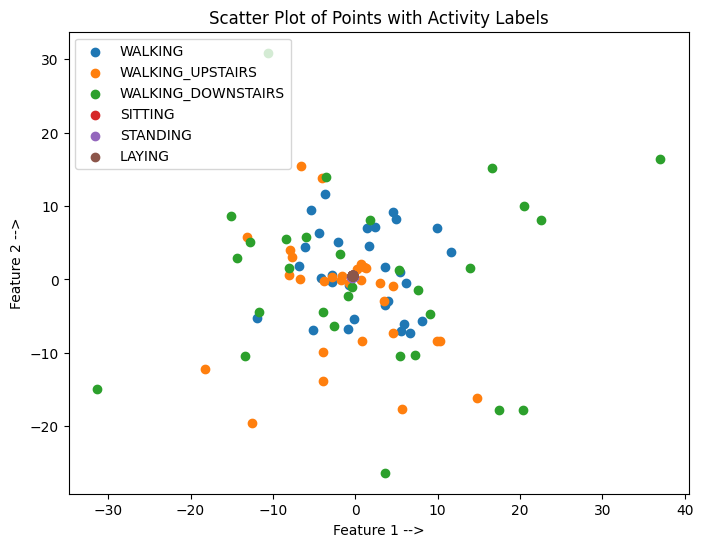

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from tsfel import time_series_features_extractor, get_features_by_domain
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')

X_data = []
for i in range(len(X_test)):
    temp = []
    for j in range(len(X_test[0])):
        temp.append(np.dot(X_test[i][j],np.transpose(X_test[i][j])))
    X_data.append(temp)

for i in range(len(X_train)):
    temp = []
    for j in range(len(X_train[0])):
        temp.append(np.dot(X_train[i][j],np.transpose(X_train[i][j])))
    X_data.append(temp)

for i in range(len(X_val)):
    temp = []
    for j in range(len(X_val[0])):
        temp.append(np.dot(X_val[i][j],np.transpose(X_val[i][j])))
    X_data.append(temp)

X_data = np.array(X_data)
y_data = np.array(list(y_test)+list(y_train)+list(y_val))
df = pd.DataFrame(X_data)
# df.columns = [i for i in range(100,600)]
scaling = StandardScaler()
scaling.fit(df)
Scaled_data = scaling.transform(df)
principal = PCA(n_components=2)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)

plt.figure(figsize=(8, 6))
for i, activity in enumerate(classes):
    indices = y_data == classes[activity]
    plt.scatter(x[indices, 0], x[indices, 1], label=activity)
plt.xlabel('Feature 1 -->')
plt.ylabel('Feature 2 -->')

plt.title('Scatter Plot of Points with Activity Labels')
plt.legend()
plt.show()